<a href="https://colab.research.google.com/github/musicjae/Reinforcement_Learning/blob/master/intro_RL/MDP%2Cpolicy_iter%2Cvalue_iter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 2.png to 2.png
User uploaded file "2.png" with length 53509 bytes


In [2]:
from IPython.display import Image

# 1. 개괄  

- 강화학습: env와 agent가 상호작용하면서 스스로 학습  
- 순차적 행동 결정:  
  - 문제를 수학적으로 정의  
  - 순차적으로 접근  
  - MDP 사용돼  
  - 구성요소:  
    - **상태(관찰)**  
    > - agent가 관찰 가능한 것들의 집합  
      - 시간에 따라 **확률적으로** 변화
    - **행동** 
    > - agent가 상태 $S_t$에서 할 수 있는 가능한 행동의 집합 
    - **보상**: agent가 학습할 수 있는 유일한 정보  
    > 시간 t에 $S_t = s$인 상태에서 $A_t=a$일 때, agent가 받을 것  
      - $r(s,a)=E[R_{t+1}|S_t = s, A_t = a]$ where $E$는 기댓값  
    - **상태** **변환** **확률**  
    >   환경이 에이전트가 $S_t=s$에서 $A_t=a$를 취할 때 가야 할 상태 $S_{t+1}$을 알려준다. 그것을 표현한 확률.
      - $P_{ss}^a=P[S_{t+1} = s|S_t = s, A_t=a]$  
    - **할인율**: 같은 보상이면 나중에 받을수록 가치가 줄어든다.  
    > 할인율을 고려한 미래 보상의 현재 가치: $\gamma^{k-1}R_{t+k}$
    - **정책** policy: $\forall$상태: agent가 어떤 행동을 해야 하는지 정해놓은 것  
    > Optimal Policy: 학습 해야 할 수 많은 정책들 중에 제일 좋은 정책  
      - Policy: $\pi(a|s)=P[A_t = a|S_t=s]$  
        
에이전트의 목표: 가장 많은 보상을 받게 하는 최적의 정책을 학습하는 것
    

## 1.1 강화학습 알고리즘의 흐름도

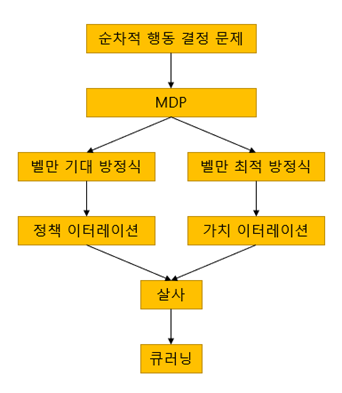

In [7]:
# https://m.blog.naver.com/PostView.nhn?blogId=za_bc&logNo=221549631328&proxyReferer=https:%2F%2Fwww.google.com%2F
Image('111.png',width=500)

# 2 MDP  
  
- {상태, 행동, 보상함수, 상태변환확률, 할인율} $\in$ MDP

에이전트는 MDP로 정의된 문제에서 가치 함수를 통해 최적의 행동을 선택한다. 그런데 가치 함수란 무엇인가?  
  - 상태 가치 함수  
  > 벨만 기대 방정식  
    - $v_\pi(s) = E_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s]$  
    
  > 계산 가능한 벨만 방정식  
    - $v_{\pi}(s)=\sum_{a\in A}\pi (a|s)(r_{(s,a)}+\gamma \sum_{s'\in S}P_{ss}^av_{\pi}(s'))$  

  - 행동 가치 함수 (Q 함수)  
  > 최적의 q 함수  
    - $q_*(s,a)=max_\pi[q_{\pi}(s,a)]$  
    
 > 최적 정책  
    - $\pi_*(s,a) = 1$ if $a=argmax_{a\in A}\ q_*(s,a)$, $\ \ $ otherwise $0$  
  
 > 벨만 최적 방정식  
   -  > 벨만 기대 방정식  
    - $v_\pi(s) = max_a E_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s,A_t=a]$  
   
 >  큐함수에 대한 벨만 최적 방정식  
   - $q_*(s,a)=E[R_{t+1}+\gamma max_{a'}q_*(S_{t+1},a')|S_t=s,A_t=a]$


# 3. 정책 이터레이션 vs 가치 이터레이션

## 3.1 정책 이터레이션  
  
 - (1) 정책 평가  
 > Use 벨만 기대 방정식
 - (2) 정책 발전  
> 최적 정책에 따라 발전


## 3.2 가치 이터레이션  
- 정책 이터레이션은 any 정책들 중 최적 정책을 찾기 위한 과정이었다. 하지만 "현재 가치 함수가 최적은 아니지만 최적이라고 가정"하고, 그 가치 함수에 대한 결정된 형태의 정책을 적용한다면 어떨까?  
> 만약 그렇다면, 그것은 틀린 가정일 수 있지만, 반복적으로 그 가치 함수를 발전시켜 최적에 도달한다면, 문제가 되지 않을 것이다. --> 가치 이터레이션  
  
- 벨만 최적 방정식을 이용하는 가치 이터레이션  
  
> $v_\pi(s) = max_a E_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s,A_t=a]$    
  - 이것을 이용하면 따로 정책 발전이 요구되지 않는다. 시작부터 "최적 정책"을 가정했기 때문이다. (여기서 가치 함수를 최적 정책에 대한 것이라고 가정)

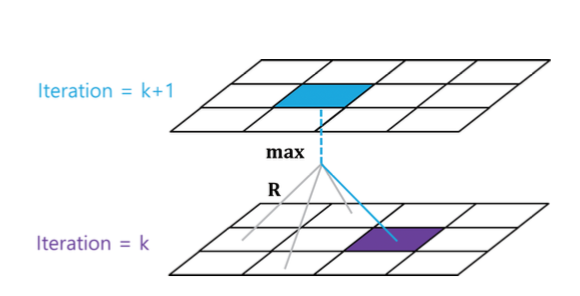

In [6]:
Image('2.png')

## 3.3 정책 이터레이션 실습

# References  
[1] 이웅원 외, "파이썬과 케라스로 배우는 강화학습", 위키북스